In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import numpy as np

In [2]:
class KMean:
    def __init__(self,k,max_iter=300):
        self.k = k
        self.centroids = None
        self.max_iter = max_iter
    def initialize_centroids(self, points, k):
        """returns k centroids from the initial points"""
        centroids = points.copy()
        np.random.shuffle(centroids)
        return centroids[:k]
    def closest_centroid(self, points, centroids):
        """returns an array containing the index to the nearest centroid for each point"""
        distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
        
        return np.argmin(distances, axis=0)
    def move_centroids(self, points, closest, centroids):
        """returns the new centroids assigned from the points closest to them"""
        return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])
    
    def fit(self, points):
        self.centroids = self.initialize_centroids(points, self.k)
        centroids = None
        for i in range(self.max_iter):
            closest = self.predict(points)
            self.centroids = self.move_centroids(points, closest, self.centroids)
        return closest 
    
    def predict(self, points):
        closest = self.closest_centroid(points, self.centroids)
        return closest

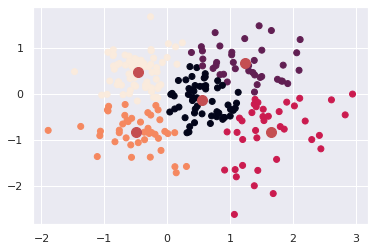

In [3]:
if __name__=='__main__':                  
    k = KMean(5)
    points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                      (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                      (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))
    closest = k.fit(points)
    fig = plt.figure()
    
    ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
    
    ax.cla()
    ax.scatter(points[:, 0], points[:, 1], c=closest)
    ax.scatter(k.centroids[:, 0], k.centroids[:, 1], c='r', s=100)

In [4]:
import numpy as np
from skimage import io
img  = io.imread('f.png')
img_data = (img / 255.).reshape(-1, 3)
img_data.shape

(1103200, 3)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class plot_utils:
    def __init__(self, img_data, title, num_pixels=10000, colors=None):
        self.img_data = img_data
        self.title = title
        self.num_pixels = num_pixels
        self.colors = colors

    def colorSpace(self):
        if self.colors is None:
            self.colors = self.img_data

        rand = np.random.RandomState(42)
        index = rand.permutation(self.img_data.shape[0])[:self.num_pixels]
        colors = self.colors[index]
        R, G, B = self.img_data[index].T
        fig, ax = plt.subplots(1, 2, figsize=(12,8))
        ax[0].scatter(R, G, color=colors, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
        ax[1].scatter(R, B, color=colors, marker='.')
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
        fig.suptitle(self.title, size=20)

In [6]:
import time

start = time.time()
kmeans = KMean(k=16, max_iter=20)
closest = kmeans.fit(img_data)
k_colors = kmeans.centroids[closest]
print(f'elapsed: {time.time() - start}')

elapsed: 21.184672594070435


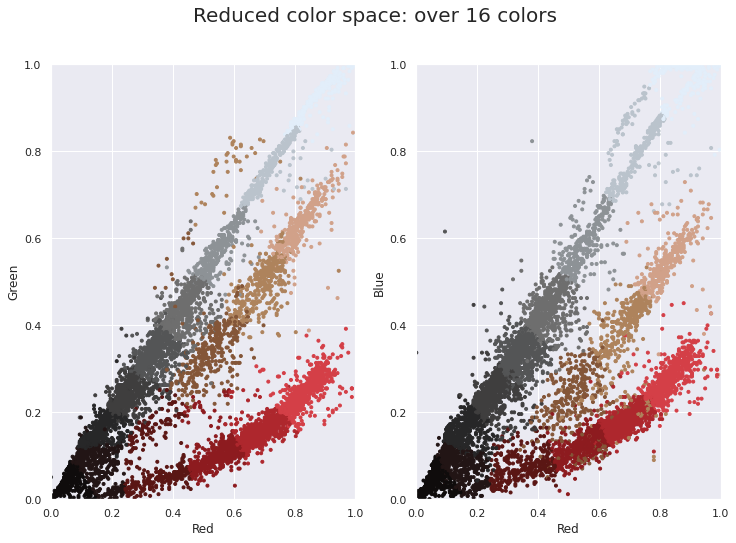

In [7]:
y = plot_utils(img_data, colors=k_colors, title="Reduced color space: over 16 colors")
y.colorSpace()

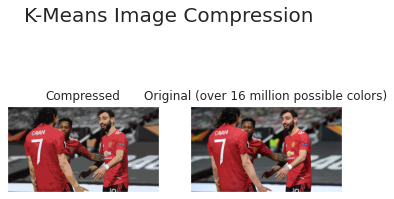

In [8]:
k_img = np.reshape(k_colors,(img.shape))
    
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('K-Means Image Compression', fontsize=20)


ax1.set_title('Compressed')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(k_img)

ax2.set_title('Original (over 16 million possible colors)')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.imshow(img)
#adjust the heading
plt.subplots_adjust(top=.85)
plt.show()

In [9]:
plt.imsave('manu.jpg',k_img)

In [10]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def main():
     original = cv2.imread("f.png")
     compressed = cv2.imread("manu.jpg", 1)
     value = PSNR(original, compressed)
     print(f"PSNR value is {value} dB")
       
if __name__ == "__main__":
    main()


PSNR value is 30.795224972209965 dB
